In [1]:
# Dependencies to import.
import numpy as np
import pandas as pd
import scipy.stats as states
import math
import warnings
warnings.filterwarnings('ignore')

# Csv files to locate for the analysis of death counts within five states that we chose.
california_state_locator = "csv files/California case_demographics_age.csv"
connecticut_state_locator = "csv files/Conneticut COVID-19_Cases_and_Deaths_by_Age_Group.csv"
virginia_state_locator = "csv files/Virginia COVID-19-PublicUseDataset-Cases_By-Age-Group.csv"
florida_state_locator = "csv files/COVID-19 in Florida- What Is the Death Rate by Age Group.csv"
georgia_state_locator = "csv files/COVID-19 in Georgia- What Is the Death Rate by Age Group.csv"

# Csv file to locate for comparing the five states death count with the overall United States death count.
states_comparison_locator = "csv files/All States Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv"

# Csv files reader
california_state_df = pd.read_csv(california_state_locator)
connecticut_state_df = pd.read_csv(connecticut_state_locator)
virginia_state_df = pd.read_csv(virginia_state_locator)
florida_state_df = pd.read_csv(florida_state_locator)
georgia_state_df = pd.read_csv(georgia_state_locator)
states_comparison_df = pd.read_csv(states_comparison_locator)

In [2]:
# Cleaning the California state data.
columns = ["Age Groups", "COVID-19 Deaths"]

raw_california_state_df = california_state_df[["age_group", "deaths"]]
raw_california_state_df = raw_california_state_df.dropna()
raw_california_state_df = raw_california_state_df.rename(columns={"age_group": "Age Groups", "deaths": "COVID-19 Deaths"})
raw_california_state_df["Age Groups"].replace({"65+": "65 and Older"}, inplace=True)
raw_california_state_df.drop(raw_california_state_df[raw_california_state_df["Age Groups"] == "Unknown"].index, inplace = True)
raw_california_state_df.drop(raw_california_state_df[raw_california_state_df["Age Groups"] == "Missing"].index, inplace = True)
final_first_formatter = raw_california_state_df.loc[raw_california_state_df["Age Groups"] == "0-17", columns]
raw_second_formatter = raw_california_state_df.loc[raw_california_state_df["Age Groups"] == "18-49", columns]
raw_third_formatter = raw_california_state_df.loc[raw_california_state_df["Age Groups"] == "50-64", columns]
final_fourth_formatter = raw_california_state_df.loc[raw_california_state_df["Age Groups"] == "65 and Older", columns]
final_second_formatter = raw_second_formatter.reset_index()
del final_second_formatter["index"]
final_third_formatter = raw_third_formatter.reset_index()
del final_third_formatter["index"]
intermediary_second_formatter = final_second_formatter["COVID-19 Deaths"] + final_third_formatter["COVID-19 Deaths"]*(1/3)
intermediary_third_formatter = final_third_formatter["COVID-19 Deaths"] - final_third_formatter["COVID-19 Deaths"]*(1/3)
final_second_formatter["COVID-19 Deaths"] = intermediary_second_formatter
final_third_formatter["COVID-19 Deaths"] = intermediary_third_formatter
raw_merged_california_state_df = pd.merge(final_first_formatter, final_second_formatter, how='outer', on=["Age Groups", "COVID-19 Deaths"])
intermediary_merged_california_state_df = pd.merge(raw_merged_california_state_df, final_third_formatter, how='outer', on=["Age Groups", "COVID-19 Deaths"])
final_california_state_df = pd.merge(intermediary_merged_california_state_df, final_fourth_formatter, 
                                            how='outer', on=["Age Groups","COVID-19 Deaths"])
final_california_state_df["Age Groups"].replace({"0-17":"Younger than 55", "18-49":"Younger than 55", "50-64":"Between 55 and 64"}, inplace=True)

In [3]:
# Creating a new statistics table for the California state.
index = ["Younger than 55", "Between 55 and 64", "65 and Older"]
california_state_age_group = final_california_state_df.groupby("Age Groups")
mean_california_state_age_group = california_state_age_group["COVID-19 Deaths"].mean()
median_california_state_age_group = california_state_age_group["COVID-19 Deaths"].median()
stdev_california_state_age_group = california_state_age_group["COVID-19 Deaths"].std()
var_california_state_age_group = california_state_age_group["COVID-19 Deaths"].var()
sem_california_state_age_group = california_state_age_group["COVID-19 Deaths"].sem()
sum_california_state_age_group = california_state_age_group["COVID-19 Deaths"].sum()
min_california_state_age_group = california_state_age_group["COVID-19 Deaths"].min()
max_california_state_age_group = california_state_age_group["COVID-19 Deaths"].max()

california_raw_summary_statistics = pd.DataFrame({"Mean Covid-19 Deaths": mean_california_state_age_group,
                                                  "Median of Covid-19 Deaths": median_california_state_age_group,
                                                  "Standard Deviation of Covid-19 Deaths": stdev_california_state_age_group,
                                                  "Variance of Covid-19 Deaths": var_california_state_age_group,
                                                  "SEM of Covid-19 Deaths": sem_california_state_age_group,
                                                  "Sum of Covid-19 Deaths": sum_california_state_age_group,
                                                  "Min Covid-19 Deaths": min_california_state_age_group,
                                                  "Max Covid-19 Deaths": max_california_state_age_group},
                                                  index=index)

california_summary_statistics = california_raw_summary_statistics.style.format({"Mean Covid-19 Deaths": ("{:.0f}"),
                                                                                "Median of Covid-19 Deaths": ("{:.2f}"),
                                                                                "Standard Deviation of Covid-19 Deaths": ("{:.2f}"),
                                                                                "Variance of Covid-19 Deaths": ("{:.2f}"),
                                                                                "SEM of Covid-19 Deaths": ("{:.2f}"),
                                                                                "Sum of Covid-19 Deaths": ("{:.0f}"),
                                                                                "Min Covid-19 Deaths": ("{:.0f}"),
                                                                                "Max Covid-19 Deaths": ("{:.0f}")
                                                                               })

bold_start = '\033[1m'
print(bold_start, "California Summary Statistics Table")
california_summary_statistics

 California Summary Statistics Table


,Mean Covid-19 Deaths,Median of Covid-19 Deaths,Standard Deviation of Covid-19 Deaths,Variance of Covid-19 Deaths,SEM of Covid-19 Deaths,Sum of Covid-19 Deaths,Min Covid-19 Deaths,Max Covid-19 Deaths
Younger than 55,233,86.67,265.76,70629.82,21.01,37298,0,836
Between 55 and 64,435,426.00,175.34,30743.72,19.60,34809,149,780
65 and Older,3201,3231.50,1181.45,1395819.36,132.09,256105,1074,5276


In [4]:
# Cleaning the Connecticut state data.
columns = ["Age Groups", "COVID-19 Deaths"]

raw_connecticut_state_df = connecticut_state_df[["AgeGroups", "Total deaths"]]
raw_connecticut_state_df = raw_connecticut_state_df.rename(columns={"AgeGroups": "Age Groups", "Total deaths": "COVID-19 Deaths"})
raw_connecticut_state_df["Age Groups"].replace({"0 - 9":"0-9", "19-Oct": "10-19", "20 -29": "20-29", "30 - 39": "30-39",
                                                "40 -49": "40-49", "50 -59": "50-59", "60 - 69":"60-69", "70 - 79":"70-79"}, inplace=True)
final_first_formatter = raw_connecticut_state_df.loc[(raw_connecticut_state_df["Age Groups"] == "0-9") |
                                                     (raw_connecticut_state_df["Age Groups"] == "10-19") |
                                                     (raw_connecticut_state_df["Age Groups"] == "20-29") |
                                                     (raw_connecticut_state_df["Age Groups"] == "30-39"), columns]                  
raw_second_formatter = raw_connecticut_state_df.loc[raw_connecticut_state_df["Age Groups"] == "40-49", columns]
raw_third_formatter = raw_connecticut_state_df.loc[raw_connecticut_state_df["Age Groups"] == "50-59", columns]
raw_fourth_formatter = raw_connecticut_state_df.loc[raw_connecticut_state_df["Age Groups"] == "60-69", columns]
final_fifth_formatter = raw_connecticut_state_df.loc[(raw_connecticut_state_df["Age Groups"] == "70-79") |
                                                     (raw_connecticut_state_df["Age Groups"] == "80 and older"), columns]
final_second_formatter = raw_second_formatter.reset_index()
del final_second_formatter["index"]
final_third_formatter = raw_third_formatter.reset_index()
del final_third_formatter["index"]
final_fourth_formatter = raw_fourth_formatter.reset_index()
del final_fourth_formatter["index"]
intermediary_second_formatter = final_second_formatter["COVID-19 Deaths"] + final_third_formatter["COVID-19 Deaths"]*(1/2)
intermediary_third_formatter = final_third_formatter["COVID-19 Deaths"]*(1/2) + final_fourth_formatter["COVID-19 Deaths"]*(1/2)
intermediary_fourth_formatter = final_fourth_formatter["COVID-19 Deaths"]*(1/2)
final_second_formatter["COVID-19 Deaths"] = intermediary_second_formatter
final_third_formatter["COVID-19 Deaths"] = intermediary_third_formatter
final_fourth_formatter["COVID-19 Deaths"] = intermediary_fourth_formatter
raw_merged_connecticut_state_df = pd.merge(final_first_formatter, final_second_formatter, how='outer', on=["Age Groups", "COVID-19 Deaths"])
intermediary_merged_connecticut_state_df = pd.merge(raw_merged_connecticut_state_df, final_third_formatter, 
                                                    how='outer', on=["Age Groups", "COVID-19 Deaths"])
final_merged_connecticut_state_df = pd.merge(intermediary_merged_connecticut_state_df, final_fourth_formatter, 
                                             how='outer', on=["Age Groups", "COVID-19 Deaths"])
final_connecticut_state_df = pd.merge(final_merged_connecticut_state_df, final_fifth_formatter, 
                                      how='outer', on=["Age Groups","COVID-19 Deaths"])
final_connecticut_state_df["Age Groups"].replace({"0-9": "Younger than 55", "10-19": "Younger than 55", "20-29": "Younger than 55", 
                                                  "30-39": "Younger than 55", "40-49": "Younger than 55", "50-59": "Between 55 and 64",
                                                  "60-69": "65 and Older", "70-79": "65 and Older", "80 and older": "65 and Older"}, inplace=True)

In [5]:
# Creating a new statistics table for the Connecticut state.
index = ["Younger than 55", "Between 55 and 64", "65 and Older"]
connecticut_state_age_group = final_connecticut_state_df.groupby("Age Groups")
mean_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].mean()
median_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].median()
stdev_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].std()
var_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].var()
sem_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].sem()
sum_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].sum()
min_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].min()
max_connecticut_state_age_group = connecticut_state_age_group["COVID-19 Deaths"].max()

raw_connecticut_summary_statistics = pd.DataFrame({"Mean Covid-19 Deaths": mean_connecticut_state_age_group,
                                                   "Median of Covid-19 Deaths": median_connecticut_state_age_group,
                                                   "Standard Deviation of Covid-19 Deaths": stdev_connecticut_state_age_group,
                                                   "Variance of Covid-19 Deaths": var_connecticut_state_age_group,
                                                   "SEM of Covid-19 Deaths": sem_connecticut_state_age_group,
                                                   "Sum of Covid-19 Deaths": sum_connecticut_state_age_group,
                                                   "Min Covid-19 Deaths": min_connecticut_state_age_group,
                                                   "Max Covid-19 Deaths": max_connecticut_state_age_group},
                                                   index=index)

connecticut_summary_statistics = raw_connecticut_summary_statistics.style.format({"Mean Covid-19 Deaths": ("{:.0f}"),
                                                                                  "Median of Covid-19 Deaths": ("{:.2f}"),
                                                                                  "Standard Deviation of Covid-19 Deaths": ("{:.2f}"),
                                                                                  "Variance of Covid-19 Deaths": ("{:.2f}"),
                                                                                  "SEM of Covid-19 Deaths": ("{:.2f}"),
                                                                                  "Sum of Covid-19 Deaths": ("{:.0f}"),
                                                                                  "Min Covid-19 Deaths": ("{:.0f}"),
                                                                                  "Max Covid-19 Deaths": ("{:.0f}")
                                                                                 })

bold_start = '\033[1m'
print(bold_start, "Connecticut Summary Statistics Table")
connecticut_summary_statistics

 Connecticut Summary Statistics Table


,Mean Covid-19 Deaths,Median of Covid-19 Deaths,Standard Deviation of Covid-19 Deaths,Variance of Covid-19 Deaths,SEM of Covid-19 Deaths,Sum of Covid-19 Deaths,Min Covid-19 Deaths,Max Covid-19 Deaths
Younger than 55,25,4.00,44.25,1958.34,2.04,11984,0,144
Between 55 and 64,254,306.50,106.52,11346.71,10.99,23903,18,356
65 and Older,893,630.00,850.87,723986.24,50.67,251909,14,2605


In [6]:
# Cleaning the Virginia state data.
columns = ["Age Groups", "COVID-19 Deaths"]

raw_virginia_state_df = virginia_state_df[["Age Group", "Number of Deaths"]]
raw_virginia_state_df = raw_virginia_state_df.rename(columns={"Age Group": "Age Groups", "Number of Deaths": "COVID-19 Deaths"})
raw_virginia_state_df.drop(raw_virginia_state_df[raw_virginia_state_df["Age Groups"] == "Missing"].index, inplace = True)
final_first_formatter = raw_virginia_state_df.loc[(raw_virginia_state_df["Age Groups"] == "0-9") |
                                                  (raw_virginia_state_df["Age Groups"] == "10-19") |
                                                  (raw_virginia_state_df["Age Groups"] == "20-29") |
                                                  (raw_virginia_state_df["Age Groups"] == "30-39"), columns]                  
raw_second_formatter = raw_virginia_state_df.loc[raw_virginia_state_df["Age Groups"] == "40-49", columns]
raw_third_formatter = raw_virginia_state_df.loc[raw_virginia_state_df["Age Groups"] == "50-59", columns]
raw_fourth_formatter = raw_virginia_state_df.loc[raw_virginia_state_df["Age Groups"] == "60-69", columns]
final_fifth_formatter = raw_virginia_state_df.loc[(raw_virginia_state_df["Age Groups"] == "70-79") |
                                                  (raw_virginia_state_df["Age Groups"] == "80+"), columns]
final_second_formatter = raw_second_formatter.reset_index()
del final_second_formatter["index"]
final_third_formatter = raw_third_formatter.reset_index()
del final_third_formatter["index"]
final_fourth_formatter = raw_fourth_formatter.reset_index()
del final_fourth_formatter["index"]
intermediary_second_formatter = final_second_formatter["COVID-19 Deaths"] + final_third_formatter["COVID-19 Deaths"]*(1/2)
intermediary_third_formatter = final_third_formatter["COVID-19 Deaths"]*(1/2) + final_fourth_formatter["COVID-19 Deaths"]*(1/2)
intermediary_fourth_formatter = final_fourth_formatter["COVID-19 Deaths"]*(1/2)
final_second_formatter["COVID-19 Deaths"] = intermediary_second_formatter
final_third_formatter["COVID-19 Deaths"] = intermediary_third_formatter
final_fourth_formatter["COVID-19 Deaths"] = intermediary_fourth_formatter
raw_merged_virginia_state_df = pd.merge(final_first_formatter, final_second_formatter, how='outer', on=["Age Groups", "COVID-19 Deaths"])
intermediary_merged_virginia_state_df = pd.merge(raw_merged_virginia_state_df, final_third_formatter, 
                                                 how='outer', on=["Age Groups", "COVID-19 Deaths"])
final_merged_virginia_state_df = pd.merge(intermediary_merged_virginia_state_df, final_fourth_formatter, 
                                          how='outer', on=["Age Groups", "COVID-19 Deaths"])
final_virginia_state_df = pd.merge(final_merged_virginia_state_df, final_fifth_formatter, 
                                   how='outer', on=["Age Groups","COVID-19 Deaths"])
final_virginia_state_df["Age Groups"].replace({"0-9": "Younger than 55", "10-19": "Younger than 55", "20-29": "Younger than 55", 
                                                  "30-39": "Younger than 55", "40-49": "Younger than 55", "50-59": "Between 55 and 64",
                                                  "60-69": "65 and Older", "70-79": "65 and Older", "80+": "65 and Older"}, inplace=True)

In [7]:
# Creating a new statistics table for the Virginia state.
index = ["Younger than 55", "Between 55 and 64", "65 and Older"]
virginia_state_age_group = final_virginia_state_df.groupby("Age Groups")
mean_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].mean()
median_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].median()
stdev_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].std()
var_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].var()
sem_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].sem()
sum_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].sum()
min_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].min()
max_virginia_state_age_group = virginia_state_age_group["COVID-19 Deaths"].max()

raw_virginia_summary_statistics = pd.DataFrame({"Mean Covid-19 Deaths": mean_virginia_state_age_group,
                                                "Median of Covid-19 Deaths": median_virginia_state_age_group,
                                                "Standard Deviation of Covid-19 Deaths": stdev_virginia_state_age_group,
                                                "Variance of Covid-19 Deaths": var_virginia_state_age_group,
                                                "SEM of Covid-19 Deaths": sem_virginia_state_age_group,
                                                "Sum of Covid-19 Deaths": sum_virginia_state_age_group,
                                                "Min Covid-19 Deaths": min_virginia_state_age_group,
                                                "Max Covid-19 Deaths": max_virginia_state_age_group},
                                                index=index)

virginia_summary_statistics = raw_virginia_summary_statistics.style.format({"Mean Covid-19 Deaths": ("{:.0f}"),
                                                                            "Median of Covid-19 Deaths": ("{:.2f}"),
                                                                            "Standard Deviation of Covid-19 Deaths": ("{:.2f}"),
                                                                            "Variance of Covid-19 Deaths": ("{:.2f}"),
                                                                            "SEM of Covid-19 Deaths": ("{:.2f}"),
                                                                            "Sum of Covid-19 Deaths": ("{:.0f}"),
                                                                            "Min Covid-19 Deaths": ("{:.0f}"),
                                                                            "Max Covid-19 Deaths": ("{:.0f}")
                                                                           })

bold_start = '\033[1m'
print(bold_start, "Virginia Summary Statistics Table")
virginia_summary_statistics

 Virginia Summary Statistics Table


,Mean Covid-19 Deaths,Median of Covid-19 Deaths,Standard Deviation of Covid-19 Deaths,Variance of Covid-19 Deaths,SEM of Covid-19 Deaths,Sum of Covid-19 Deaths,Min Covid-19 Deaths,Max Covid-19 Deaths
Younger than 55,1,0.00,2.31,5.32,0.19,137,0,17
Between 55 and 64,6,4.00,6.96,48.48,1.18,212,0,33
65 and Older,16,6.00,33.53,1124.47,3.27,1676,0,293


In [8]:
# Cleaning the Florida state data.
florida_state_df = florida_state_df.rename(columns={"Age Group": "Age Groups", "Cases": "COVID-19 Cases",
                                                    "Hospitalizations": "COVID-19 Hospitalizations",  "Deaths": "COVID-19 Deaths"
                                                    })
florida_state_df.drop(florida_state_df[florida_state_df["Age Groups"] == "Unknown"].index, inplace = True)
florida_state_df.drop(florida_state_df[florida_state_df["Age Groups"] == "Total"].index, inplace = True)
florida_state_df["Age Groups"].replace({"0-4 years": "Younger than 55", "5-14 years": "Younger than 55", "15-24 years": "Younger than 55", 
                                        "25-34 years": "Younger than 55", "35-44 years": "Younger than 55", "45-54 years": "Younger than 55",
                                        "55-64 years": "Between 55 and 64", "65-74 years": "65 and Older", "75-84 years": "65 and Older", 
                                        "85+ years": "65 and Older"}, inplace=True)

In [9]:
# Creating a new kind of table for the Florida state.
cases_sum = florida_state_df["COVID-19 Cases"].sum()
hospitalizations_sum = florida_state_df["COVID-19 Hospitalizations"].sum()
deaths_sum = florida_state_df["COVID-19 Deaths"].sum()

index = ["Younger than 55", "Between 55 and 64", "65 and Older"]
florida_state_age_group = florida_state_df.groupby("Age Groups")
mean_florida_state_age_group_cases = florida_state_age_group["COVID-19 Cases"].mean()
mean_florida_state_age_group_hospitalizations = florida_state_age_group["COVID-19 Hospitalizations"].mean()
mean_florida_state_age_group_deaths = florida_state_age_group["COVID-19 Deaths"].mean()
sum_florida_state_age_group_cases = florida_state_age_group["COVID-19 Cases"].sum()
sum_florida_state_age_group_hospitalizations = florida_state_age_group["COVID-19 Hospitalizations"].sum()
sum_florida_state_age_group_deaths = florida_state_age_group["COVID-19 Deaths"].sum()
percentage_florida_state_age_group_cases = (florida_state_age_group["COVID-19 Cases"].sum()/cases_sum)*100
percentage_florida_state_age_group_hospitalizations = (florida_state_age_group["COVID-19 Hospitalizations"].sum()/hospitalizations_sum)*100
percentage_florida_state_age_group_deaths = (florida_state_age_group["COVID-19 Deaths"].sum()/deaths_sum)*100

raw_florida_report = pd.DataFrame({"Mean COVID-19 Cases": mean_florida_state_age_group_cases,
                                   "Mean COVID-19 Hospitatizations": mean_florida_state_age_group_hospitalizations,
                                   "Mean COVID-19 Deaths": mean_florida_state_age_group_deaths,
                                   "Sum COVID-19 Cases": sum_florida_state_age_group_cases,
                                   "Sum COVID-19 Hospitalizations": sum_florida_state_age_group_hospitalizations,
                                   "Sum COVID-19 Deaths": sum_florida_state_age_group_deaths,
                                   "% COVID-19 Cases": percentage_florida_state_age_group_cases,
                                   "% COVID-19 Hospitalizations": percentage_florida_state_age_group_hospitalizations,
                                   "% COVID-19 Deaths": percentage_florida_state_age_group_deaths},
                                   index=index)

def round_down(value, decimal=0): 
    multiplier = 10 ** decimal
    return math.trunc(value * multiplier) / multiplier

raw_florida_report.at["Younger than 55", "% COVID-19 Hospitalizations"] = round_down((raw_florida_report.iloc[0, 7]), 2)

florida_report = raw_florida_report.style.format({"Mean COVID-19 Cases": ("{:.0f}"),
                                                  "Mean COVID-19 Hospitatizations": ("{:.0f}"),
                                                  "Mean COVID-19 Deaths": ("{:.0f}"),
                                                  "Sum COVID-19 Cases": ("{:.0f}"),
                                                  "Sum COVID-19 Hospitalizations": ("{:.0f}"),
                                                  "Sum COVID-19 Deaths": ("{:.0f}"),
                                                  "% COVID-19 Cases": ("{:.2f}%"),
                                                  "% COVID-19 Hospitalizations": ("{:.2f}%"),
                                                  "% COVID-19 Deaths": ("{:.2f}%")
                                                })

bold_start = '\033[1m'
print(bold_start, "Florida Report")
florida_report

 Florida Report


,Mean COVID-19 Cases,Mean COVID-19 Hospitatizations,Mean COVID-19 Deaths,Sum COVID-19 Cases,Sum COVID-19 Hospitalizations,Sum COVID-19 Deaths,% COVID-19 Cases,% COVID-19 Hospitalizations,% COVID-19 Deaths
Younger than 55,32654,987,50,195921,5921,301,73.76%,32.40%,7.10%
Between 55 and 64,32712,3206,398,32712,3206,398,12.32%,17.55%,9.38%
65 and Older,12326,3048,1181,36979,9144,3543,13.92%,50.05%,83.52%


In [10]:
# Cleaning the Georgia state data.
columns = ["COVID-19 Cases", "COVID-19 Hospitalizations", "COVID-19 Deaths"]

raw_georgia_state_df = georgia_state_df.rename(columns={"Age Group": "Age Groups", "Cases": "COVID-19 Cases",
                                                        "Hospitalizations": "COVID-19 Hospitalizations", "Deaths": "COVID-19 Deaths" 
                                                        })

raw_georgia_state_df.drop(raw_georgia_state_df[raw_georgia_state_df["Age Groups"] == "Unknown"].index, inplace = True)
raw_georgia_state_df.drop(raw_georgia_state_df[raw_georgia_state_df["Age Groups"] == "Total"].index, inplace = True)

raw_first_formatter = raw_georgia_state_df.iloc[6:7, 1:4]
raw_second_formatter = raw_georgia_state_df.iloc[7:8, 1:4]
raw_third_formatter = raw_georgia_state_df.iloc[8:9, 1:4]

raw_first_formatter_list = []
raw_second_formatter_list = []
raw_third_formatter_list = []
final_first_formatter_list = []
final_second_formatter_list = []
final_third_formatter_list = []

for labels in columns:
    intermediary_first_formatter = float(raw_first_formatter[labels])
    raw_first_formatter_list.append(intermediary_first_formatter)
    intermediary_second_formatter = float(raw_second_formatter[labels])
    raw_second_formatter_list.append(intermediary_second_formatter)
    intermediary_third_formatter = float(raw_third_formatter[labels])
    raw_third_formatter_list.append(intermediary_third_formatter)

zip_object = zip(raw_first_formatter_list, raw_second_formatter_list, raw_third_formatter_list)
for raw_first_formatter_list_i, raw_second_formatter_list_i, raw_third_formatter_list_i in zip_object:
    intermediary_first_formatter_2 = raw_first_formatter_list_i + raw_second_formatter_list_i*(1/2)
    final_first_formatter_list.append(intermediary_first_formatter_2)
    intermediary_second_formatter_2 = raw_second_formatter_list_i*(1/2) + raw_third_formatter_list_i*(1/2)
    final_second_formatter_list.append(intermediary_second_formatter_2)
    intermediary_third_formatter_2 = raw_third_formatter_list_i*(1/2)
    final_third_formatter_list.append(intermediary_third_formatter_2)

raw_georgia_state_df.iloc[6:7, 1:4] = final_first_formatter_list
raw_georgia_state_df.iloc[7:8, 1:4] = final_second_formatter_list
raw_georgia_state_df.iloc[8:9, 1:4] = final_third_formatter_list

final_georgia_state_df = raw_georgia_state_df 
final_georgia_state_df.replace({"<1": "Younger than 55", "1-4 years": "Younger than 55", "5-9 years": "Younger than 55", 
                                "10-17 years": "Younger than 55", "18-29 years": "Younger than 55", "30-39 years": "Younger than 55",
                                "40-49 years": "Younger than 55", "50-59 years": "Between 55 and 64", "60-69 years": "65 and Older", 
                                "70-79 years": "65 and Older", "80 & Older": "65 and Older"}, inplace=True)


In [11]:
# Creating a new kind of table for the Georgia state.
cases_sum = final_georgia_state_df["COVID-19 Cases"].sum()
hospitalizations_sum = final_georgia_state_df["COVID-19 Hospitalizations"].sum()
deaths_sum = final_georgia_state_df["COVID-19 Deaths"].sum()

index = ["Younger than 55", "Between 55 and 64", "65 and Older"]
georgia_state_age_group = final_georgia_state_df.groupby("Age Groups")
mean_georgia_state_age_group_cases = georgia_state_age_group["COVID-19 Cases"].mean()
mean_georgia_state_age_group_hospitalizations = georgia_state_age_group["COVID-19 Hospitalizations"].mean()
mean_georgia_state_age_group_deaths = georgia_state_age_group["COVID-19 Deaths"].mean()
sum_georgia_state_age_group_cases = georgia_state_age_group["COVID-19 Cases"].sum()
sum_georgia_state_age_group_hospitalizations = georgia_state_age_group["COVID-19 Hospitalizations"].sum()
sum_georgia_state_age_group_deaths = georgia_state_age_group["COVID-19 Deaths"].sum()
percentage_georgia_state_age_group_cases = (georgia_state_age_group["COVID-19 Cases"].sum()/cases_sum)*100
percentage_georgia_state_age_group_hospitalizations = (georgia_state_age_group["COVID-19 Hospitalizations"].sum()/hospitalizations_sum)*100
percentage_georgia_state_age_group_deaths = (georgia_state_age_group["COVID-19 Deaths"].sum()/deaths_sum)*100

raw_georgia_report = pd.DataFrame({"Mean COVID-19 Cases": mean_georgia_state_age_group_cases,
                                   "Mean COVID-19 Hospitatizations": mean_georgia_state_age_group_hospitalizations,
                                   "Mean COVID-19 Deaths": mean_georgia_state_age_group_deaths,
                                   "Sum COVID-19 Cases": sum_georgia_state_age_group_cases,
                                   "Sum COVID-19 Hospitalizations": sum_georgia_state_age_group_hospitalizations,
                                   "Sum COVID-19 Deaths": sum_georgia_state_age_group_deaths,
                                   "% COVID-19 Cases": percentage_georgia_state_age_group_cases,
                                   "% COVID-19 Hospitalizations": percentage_georgia_state_age_group_hospitalizations,
                                   "% COVID-19 Deaths": percentage_georgia_state_age_group_deaths},
                                   index=index)

def round_up(value, decimal=0): 
    multiplier = 10 ** decimal
    return math.ceil(value * multiplier) / multiplier

raw_georgia_report.at["Younger than 55", "% COVID-19 Hospitalizations"] = round_up((raw_georgia_report.iloc[0, 7]), 2)

georgia_report = raw_georgia_report.style.format({"Mean COVID-19 Cases": ("{:.0f}"),
                                                  "Mean COVID-19 Hospitatizations": ("{:.0f}"),
                                                  "Mean COVID-19 Deaths": ("{:.0f}"),
                                                  "Sum COVID-19 Cases": ("{:.0f}"),
                                                  "Sum COVID-19 Hospitalizations": ("{:.0f}"),
                                                  "Sum COVID-19 Deaths": ("{:.0f}"),
                                                  "% COVID-19 Cases": ("{:.2f}%"),
                                                  "% COVID-19 Hospitalizations": ("{:.2f}%"),
                                                  "% COVID-19 Deaths": ("{:.2f}%")
                                                 })

bold_start = '\033[1m'
print(bold_start, "Georgia Report")
georgia_report

 Georgia Report


,Mean COVID-19 Cases,Mean COVID-19 Hospitatizations,Mean COVID-19 Deaths,Sum COVID-19 Cases,Sum COVID-19 Hospitalizations,Sum COVID-19 Deaths,% COVID-19 Cases,% COVID-19 Hospitalizations,% COVID-19 Deaths
Younger than 55,14446,852,50,101120,5962,351,72.79%,39.95%,11.08%
Between 55 and 64,16999,2908,424,16999,2908,424,12.24%,19.48%,13.37%
65 and Older,6933,2019,798,20800,6056,2394,14.97%,40.57%,75.55%


In [12]:
# Cleaning all of the states and the overall united states data for comparison purposes (from 1st February to July 4th).
columns = ["State", "Age Groups", "COVID-19 Deaths"]
raw_states_comparison_df = states_comparison_df[["State", "Sex", "Age group", "COVID-19 Deaths"]]
raw_states_comparison_df = raw_states_comparison_df.rename(columns={"Age group": "Age Groups"})

raw_states_comparison_df = raw_states_comparison_df.dropna()
raw_states_comparison_df.drop(raw_states_comparison_df[raw_states_comparison_df["Sex"] == "Unknown"].index, inplace = True)
raw_states_comparison_df.drop(raw_states_comparison_df[raw_states_comparison_df["Sex"] == "All"].index, inplace = True)
raw_states_comparison_df.drop(raw_states_comparison_df[raw_states_comparison_df["Age Groups"] == "All Ages"].index, inplace = True)
raw_states_comparison_df.drop(raw_states_comparison_df[raw_states_comparison_df["Age Groups"] == "All ages"].index, inplace = True)
intermediary_states_comparison_df = raw_states_comparison_df[["State", "Age Groups", "COVID-19 Deaths"]]
intermediary_states_comparison_df.replace({"Under 1 year": "Younger than 55", "1-4 years": "Younger than 55", "5-14 years": "Younger than 55", 
                                           "15-24 years": "Younger than 55", "25-34 years": "Younger than 55", "35-44 years": "Younger than 55",
                                           "45-54 years": "Younger than 55", "55-64 years": "Between 55 and 64", "65-74 years": "65 and Older", 
                                           "75-84 years": "65 and Older", "85 years and over": "65 and Older"}, inplace=True)

In [13]:
# Creating a table for comparing the percentage of cases of all the states with the United States based on age groups. 
columns = ["State", "Age Groups", "COVID-19 Deaths"]
index = ["Younger than 55", "Between 55 and 64", "65 and Older"]

california_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "California", columns]
california_sum = california_df["COVID-19 Deaths"].sum()
california_age_group = california_df.groupby("Age Groups")
percentage_california = (california_age_group["COVID-19 Deaths"].sum()/california_sum)*100
connecticut_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Connecticut", columns]
connecticut_sum = connecticut_df["COVID-19 Deaths"].sum()
connecticut_age_group = connecticut_df.groupby("Age Groups")
percentage_connecticut = (connecticut_age_group["COVID-19 Deaths"].sum()/connecticut_sum)*100
virginia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Virginia", columns]
virginia_sum = virginia_df["COVID-19 Deaths"].sum()
virginia_age_group = virginia_df.groupby("Age Groups")
percentage_virginia = (virginia_age_group["COVID-19 Deaths"].sum()/virginia_sum)*100
florida_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Florida", columns]
florida_sum = florida_df["COVID-19 Deaths"].sum()
florida_age_group = florida_df.groupby("Age Groups")
percentage_florida = (florida_age_group["COVID-19 Deaths"].sum()/florida_sum)*100
georgia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Georgia", columns]
georgia_sum = georgia_df["COVID-19 Deaths"].sum()
georgia_age_group = georgia_df.groupby("Age Groups")
percentage_georgia = (georgia_age_group["COVID-19 Deaths"].sum()/georgia_sum)*100
united_states_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "United States", columns]
united_states_sum = united_states_df["COVID-19 Deaths"].sum()
united_states_age_group = united_states_df.groupby("Age Groups")
percentage_united_states = (united_states_age_group["COVID-19 Deaths"].sum()/united_states_sum)*100

raw_percent_overall_report = pd.DataFrame({"% California COVID-19 Deaths": percentage_california,
                                           "% Connecticut COVID-19 Deaths": percentage_connecticut,
                                           "% Virginia COVID-19 Deaths": percentage_virginia,
                                           "% Florida COVID-19 Deaths": percentage_florida,
                                           "% Georgia COVID-19 Deaths": percentage_georgia,
                                           "% Overall U.S. COVID-19 Deaths": percentage_united_states},
                                           index=index)

def round_down(value, decimal=0): 
    multiplier = 10 ** decimal
    return math.trunc(value * multiplier) / multiplier

raw_percent_overall_report.at["Younger than 55", "% California COVID-19 Deaths"] = round_down((raw_percent_overall_report.iloc[0, 0]), 2)
raw_percent_overall_report.at["Younger than 55", "% Overall U.S. COVID-19 Deaths"] = round_down((raw_percent_overall_report.iloc[0, 5]), 2)

def round_up(value, decimal=0): 
    multiplier = 10 ** decimal
    return math.ceil(value * multiplier) / multiplier

raw_percent_overall_report.at["Younger than 55", "% Georgia COVID-19 Deaths"] = round_up((raw_percent_overall_report.iloc[0, 4]), 2)

percent_overall_report = raw_percent_overall_report.style.format({"% California COVID-19 Deaths": ("{:.2f}%"),
                                                                  "% Connecticut COVID-19 Deaths": ("{:.2f}%"),
                                                                  "% Virginia COVID-19 Deaths": ("{:.2f}%"),
                                                                  "% Florida COVID-19 Deaths": ("{:.2f}%"),
                                                                  "% Georgia COVID-19 Deaths": ("{:.2f}%"),
                                                                  "% Overall U.S. COVID-19 Deaths": ("{:.2f}%")
                                                                 })

bold_start = '\033[1m'
print(bold_start, "Overall Report: From February 2nd to July 4th, 2020")
percent_overall_report

 Overall Report: From February 2nd to July 4th, 2020


,% California COVID-19 Deaths,% Connecticut COVID-19 Deaths,% Virginia COVID-19 Deaths,% Florida COVID-19 Deaths,% Georgia COVID-19 Deaths,% Overall U.S. COVID-19 Deaths
Younger than 55,9.47%,2.61%,5.06%,6.08%,8.23%,7.48%
Between 55 and 64,12.74%,8.00%,10.64%,9.36%,13.26%,12.00%
65 and Older,77.79%,89.39%,84.30%,84.56%,78.51%,80.52%


In [14]:
california_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "California", columns]
california_group_1 = california_df[california_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
california_group_2 = california_df[california_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
california_group_3 = california_df[california_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]
connecticut_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Connecticut", columns]
connecticut_group_1 = connecticut_df[connecticut_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
connecticut_group_2 = connecticut_df[connecticut_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
connecticut_group_3 = connecticut_df[connecticut_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]
virginia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Virginia", columns]
virginia_group_1 = virginia_df[virginia_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
virginia_group_2 = virginia_df[virginia_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
virginia_group_3 = virginia_df[virginia_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]
florida_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Florida", columns]
florida_group_1 = florida_df[florida_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
florida_group_2 = florida_df[florida_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
florida_group_3 = florida_df[florida_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]
georgia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Georgia", columns]
georgia_group_1 = georgia_df[georgia_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
georgia_group_2 = georgia_df[georgia_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
georgia_group_3 = georgia_df[georgia_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]
united_states_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "United States", columns]
united_states_group_1 = united_states_df[united_states_df["Age Groups"] == "Younger than 55"]["COVID-19 Deaths"]
united_states_group_2 = united_states_df[united_states_df["Age Groups"] == "Between 55 and 64"]["COVID-19 Deaths"]
united_states_group_3 = united_states_df[united_states_df["Age Groups"] == "65 and Older"]["COVID-19 Deaths"]

print(states.f_oneway(california_group_1, california_group_2, california_group_3))
print(states.f_oneway(connecticut_group_1, connecticut_group_2, connecticut_group_3))
print(states.f_oneway(virginia_group_1, virginia_group_2, virginia_group_3))
print(states.f_oneway(florida_group_1, florida_group_2, florida_group_3))
print(states.f_oneway(georgia_group_1, georgia_group_2, georgia_group_3))
print(states.f_oneway(united_states_group_1, united_states_group_2, united_states_group_3))

F_onewayResult(statistic=41.048527342870834, pvalue=5.008551184970651e-07)
F_onewayResult(statistic=18.294428173767372, pvalue=0.0001243117611364106)
F_onewayResult(statistic=49.550429678376254, pvalue=4.790841535561226e-08)
F_onewayResult(statistic=65.3794653637298, pvalue=1.0413795497111043e-08)
F_onewayResult(statistic=90.33410477902241, pvalue=8.777135222438774e-10)
F_onewayResult(statistic=66.61797191300272, pvalue=2.5956478411774016e-09)


In [15]:
# Creating a table for comparing the total cases of all the states with the whole United States based on age groups. 
columns = ["State", "Age Groups", "COVID-19 Deaths"]
index = ["Younger than 55", "Between 55 and 64", "65 and Older"]

california_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "California", columns]
california_age_group = california_df.groupby("Age Groups")
total_california = california_age_group["COVID-19 Deaths"].sum()
connecticut_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Connecticut", columns]
connecticut_age_group = connecticut_df.groupby("Age Groups")
total_connecticut = connecticut_age_group["COVID-19 Deaths"].sum()
virginia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Virginia", columns]
virginia_age_group = virginia_df.groupby("Age Groups")
total_virginia = virginia_age_group["COVID-19 Deaths"].sum()
florida_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Florida", columns]
florida_age_group = florida_df.groupby("Age Groups")
total_florida = florida_age_group["COVID-19 Deaths"].sum()
georgia_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "Georgia", columns]
georgia_age_group = georgia_df.groupby("Age Groups")
total_georgia = georgia_age_group["COVID-19 Deaths"].sum()
united_states_df = intermediary_states_comparison_df.loc[intermediary_states_comparison_df["State"] == "United States", columns]
united_states_age_group = united_states_df.groupby("Age Groups")
total_united_states = united_states_age_group["COVID-19 Deaths"].sum()

raw_total_overall_report = pd.DataFrame({"California COVID-19 Total Deaths": total_california,
                                           "Connecticut COVID-19 Total Deaths": total_connecticut,
                                           "Virginia COVID-19 Total Deaths": total_virginia,
                                           "Florida COVID-19 Total Deaths": total_florida,
                                           "Georgia COVID-19 Total Deaths": total_georgia,
                                           "Overall U.S. COVID-19 Total Deaths": total_united_states},
                                           index=index)

total_overall_report = raw_total_overall_report.style.format({"California COVID-19 Total Deaths": ("{:.0f}"),
                                                              "Connecticut COVID-19 Total Deaths": ("{:.0f}"),
                                                              "Virginia COVID-19 Total Deaths": ("{:.0f}"),
                                                              "Florida COVID-19 Total Deaths": ("{:.0f}"),
                                                              "Georgia COVID-19 Total Deaths": ("{:.0f}"),
                                                              "Overall U.S. COVID-19 Total Deaths": ("{:.0f}")
                                                             })


bold_start = '\033[1m'
print(bold_start, "Overall Report: From February 2nd to July 4th, 2020")
total_overall_report

 Overall Report: From February 2nd to July 4th, 2020


,California COVID-19 Total Deaths,Connecticut COVID-19 Total Deaths,Virginia COVID-19 Total Deaths,Florida COVID-19 Total Deaths,Georgia COVID-19 Total Deaths,Overall U.S. COVID-19 Total Deaths
Younger than 55,489,90,87,180,168,8401
Between 55 and 64,657,276,183,277,271,13465
65 and Older,4013,3085,1450,2502,1604,90357


In [16]:
# Measuring the correlation coefficient and caluclating the equation tracing the relation between each state and the United States.
california_deaths_list = list(raw_total_overall_report["California COVID-19 Total Deaths"])
connecticut_deaths_list = list(raw_total_overall_report["Connecticut COVID-19 Total Deaths"])
virginia_deaths_list = list(raw_total_overall_report["Virginia COVID-19 Total Deaths"])
florida_deaths_list = list(raw_total_overall_report["Florida COVID-19 Total Deaths"])
georgia_deaths_list = list(raw_total_overall_report["Georgia COVID-19 Total Deaths"])
overall_US_deaths_list = list(raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"])

bold_start = '\033[1m'
back_to_normal = '\033[0m'
print(f"The correlation coefficient between the COVID-19 California deaths and the U.S COVID-19 deaths overall is of:{bold_start} {round(states.pearsonr (california_deaths_list, overall_US_deaths_list)[0],2)}{back_to_normal}.")
print(f"The correlation coefficient between the COVID-19 Connecticut deaths and the U.S COVID-19 deaths overall is of:{bold_start} {round(states.pearsonr (connecticut_deaths_list, overall_US_deaths_list)[0],2)}{back_to_normal}.")
print(f"The correlation coefficient between the COVID-19 Virginia deaths and the U.S COVID-19 deaths overall is of:{bold_start} {round(states.pearsonr (virginia_deaths_list, overall_US_deaths_list)[0],2)}{back_to_normal}.")
print(f"The correlation coefficient between the COVID-19 Florida deaths and the U.S COVID-19 deaths overall is of:{bold_start} {round(states.pearsonr (florida_deaths_list, overall_US_deaths_list)[0],2)}{back_to_normal}.")
print(f"The correlation coefficient between the COVID-19 Georgia deaths and the U.S COVID-19 deaths overall is of:{bold_start} {round(states.pearsonr (georgia_deaths_list, overall_US_deaths_list)[0],2)}{back_to_normal}.")
print("-------------------------------------------------------------------------------------------------------------------")

ca_slope, ca_int, ca_r, ca_p, ca_stderr = states.linregress(overall_US_deaths_list, california_deaths_list)
california_equation = "y = " + str(round(ca_slope,2)) + "x + " + str(round(ca_int,2))
ct_slope, ct_int, ct_r, ct_p, ct_stderr = states.linregress(overall_US_deaths_list, connecticut_deaths_list)
connecticut_equation = "y = " + str(round(ct_slope,2)) + "x - " + str(abs(round(ct_int,2)))
va_slope, va_int, va_r, va_p, va_stderr = states.linregress(overall_US_deaths_list, virginia_deaths_list)
virginia_equation = "y = " + str(round(va_slope,2)) + "x - " + str(abs(round(va_int,2)))
fl_slope, fl_int, fl_r, fl_p, fl_stderr = states.linregress(overall_US_deaths_list, florida_deaths_list)
florida_equation = "y = " + str(round(fl_slope,2)) + "x - " + str(abs(round(fl_int,2)))
ga_slope, ga_int, ga_r, ga_p, ga_stderr = states.linregress(overall_US_deaths_list, georgia_deaths_list)
georgia_equation  = "y = " + str(round(ga_slope,2)) + "x + " + str(round(ga_int,2))

print(f"The equation of the linear regression model depicting the relationship between the COVID-19 California deaths and the U.S COVID-19 deaths overall is of:")
print(f"{bold_start}{california_equation}{back_to_normal}")
print(f"The equation of the linear regression model depicting the relationship between the COVID-19 Connecticut deaths and the U.S COVID-19 deaths overall is of:")
print(f"{bold_start}{connecticut_equation}{back_to_normal}")
print(f"The equation of the linear regression model depicting the relationship between the COVID-19 Virginia deaths and the U.S COVID-19 deaths overall is of:")
print(f"{bold_start}{virginia_equation}{back_to_normal}")
print(f"The equation of the linear regression model depicting the relationship between the COVID-19 Florida deaths and the U.S COVID-19 deaths overall is of:")
print(f"{bold_start}{florida_equation}{back_to_normal}")
print(f"The equation of the linear regression model depicting the relationship between the COVID-19 Georgia deaths and the U.S COVID-19 deaths overall is of:")
print(f"{bold_start}{georgia_equation}{back_to_normal}")

The correlation coefficient between the COVID-19 California deaths and the U.S COVID-19 deaths overall is of: 1.0.
The correlation coefficient between the COVID-19 Connecticut deaths and the U.S COVID-19 deaths overall is of: 1.0.
The correlation coefficient between the COVID-19 Virginia deaths and the U.S COVID-19 deaths overall is of: 1.0.
The correlation coefficient between the COVID-19 Florida deaths and the U.S COVID-19 deaths overall is of: 1.0.
The correlation coefficient between the COVID-19 Georgia deaths and the U.S COVID-19 deaths overall is of: 1.0.
-------------------------------------------------------------------------------------------------------------------
The equation of the linear regression model depicting the relationship between the COVID-19 California deaths and the U.S COVID-19 deaths overall is of:
y = 0.04x + 100.62
The equation of the linear regression model depicting the relationship between the COVID-19 Connecticut deaths and the U.S COVID-19 deaths overa

In [17]:
def gendata(loc1=0, loc2=0):
    population1 = states.norm.rvs(loc=loc1, size=len(california_df), random_state=len(california_df))
    population2 = states.norm.rvs(loc=loc2, size=len(united_states_df), random_state=len(united_states_df))
    return population1, population2
def gendata1(loc1=0, loc2=0):
    population1 = states.norm.rvs(loc=loc1, size=len(connecticut_df), random_state=len(connecticut_df))
    population2 = states.norm.rvs(loc=loc2, size=len(united_states_df), random_state=len(united_states_df))
    return population1, population2
def gendata2(loc1=0, loc2=0):
    population1 = states.norm.rvs(loc=loc1, size=len(virginia_df), random_state=len(virginia_df))
    population2 = states.norm.rvs(loc=loc2, size=len(united_states_df), random_state=len(united_states_df))
    return population1, population2
def gendata3(loc1=0, loc2=0):
    population1 = states.norm.rvs(loc=loc1, size=len(florida_df), random_state=len(florida_df))
    population2 = states.norm.rvs(loc=loc2, size=len(united_states_df), random_state=len(united_states_df))
    return population1, population2
def gendata4(loc1=0, loc2=0):
    population1 = states.norm.rvs(loc=loc1, size=len(georgia_df), random_state=len(georgia_df))
    population2 = states.norm.rvs(loc=loc2, size=len(united_states_df), random_state=len(united_states_df))
    return population1, population2

california_deaths_list, overall_US_deaths_list = gendata(loc1=0, loc2=0)
print(states.ttest_ind(california_deaths_list, overall_US_deaths_list, equal_var=False))
connecticut_deaths_list, overall_US_deaths_list = gendata1(loc1=0, loc2=0)
print(states.ttest_ind(connecticut_deaths_list, overall_US_deaths_list, equal_var=False))
virginia_deaths_list, overall_US_deaths_list = gendata2(loc1=0, loc2=0)
print(states.ttest_ind(virginia_deaths_list, overall_US_deaths_list, equal_var=False))
florida_deaths_list, overall_US_deaths_list = gendata3(loc1=0, loc2=0)
print(states.ttest_ind(florida_deaths_list, overall_US_deaths_list, equal_var=False))
georgia_deaths_list, overall_US_deaths_list = gendata4(loc1=0, loc2=0)
print(states.ttest_ind(georgia_deaths_list, overall_US_deaths_list, equal_var=False))

Ttest_indResult(statistic=-0.8203399290614284, pvalue=0.41703549263723616)
Ttest_indResult(statistic=0.4908577546030732, pvalue=0.6269344004593188)
Ttest_indResult(statistic=-0.23547398668324046, pvalue=0.8150231180467724)
Ttest_indResult(statistic=-0.20288208749552566, pvalue=0.8402557859530221)
Ttest_indResult(statistic=-0.20288208749552566, pvalue=0.8402557859530221)


In [18]:
critical_value = states.chi2.ppf(q = 0.95, df = 2)
print(critical_value)

print(states.chisquare(raw_total_overall_report["California COVID-19 Total Deaths"], raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"]))
print(states.chisquare(raw_total_overall_report["Connecticut COVID-19 Total Deaths"], raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"]))
print(states.chisquare(raw_total_overall_report["Virginia COVID-19 Total Deaths"], raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"]))
print(states.chisquare(raw_total_overall_report["Florida COVID-19 Total Deaths"], raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"]))
print(states.chisquare(raw_total_overall_report["Georgia COVID-19 Total Deaths"], raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"]))

5.991464547107979
Power_divergenceResult(statistic=102143.74874733924, pvalue=0.0)
Power_divergenceResult(statistic=105432.95064362077, pvalue=0.0)
Power_divergenceResult(statistic=108809.65689040505, pvalue=0.0)
Power_divergenceResult(statistic=106383.83587321054, pvalue=0.0)
Power_divergenceResult(statistic=108174.28771266059, pvalue=0.0)


In [19]:
raw_total_transposed = raw_total_overall_report.transpose()
States_list = ["California COVID-19 Total Deaths", "Connecticut COVID-19 Total Deaths", "Virginia COVID-19 Total Deaths",
               "Florida COVID-19 Total", "Georgia COVID-19 Total Deaths", "Overall U.S. COVID-19 Total Deaths"]
raw_total_transposed["States COVID-19 Total Deaths"] = States_list
raw_total_transposed = raw_total_transposed.reset_index()
del raw_total_transposed["index"]
total_transposed = raw_total_transposed[["States COVID-19 Total Deaths", "Younger than 55", "Between 55 and 64", "65 and Older"]]
states_transposed = total_transposed.drop(total_transposed.index[5])
states_transposed

,States COVID-19 Total Deaths,Younger than 55,Between 55 and 64,65 and Older
0,California COVID-19 Total Deaths,489.0,657.0,4013.0
1,Connecticut COVID-19 Total Deaths,90.0,276.0,3085.0
2,Virginia COVID-19 Total Deaths,87.0,183.0,1450.0
3,Florida COVID-19 Total,180.0,277.0,2502.0
4,Georgia COVID-19 Total Deaths,168.0,271.0,1604.0


In [20]:
import matplotlib.pyplot as plt

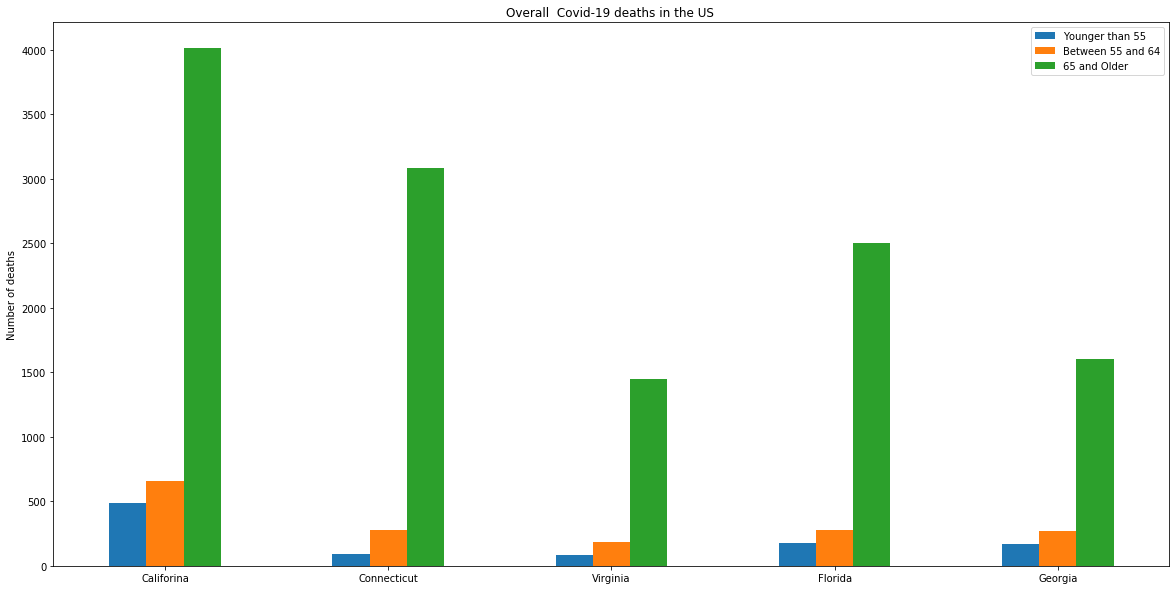

<Figure size 432x288 with 0 Axes>

In [21]:
multi_plots = states_transposed.plot(kind="bar", figsize=(20, 10))
state_list = ["Califorina","Connecticut","Virginia","Florida","Georgia"]
multi_plots.set_xticklabels(state_list, rotation=0)

plt.title("Overall  Covid-19 deaths in the US ")
plt.ylabel("Number of deaths")

plt.show()
plt.tight_layout()

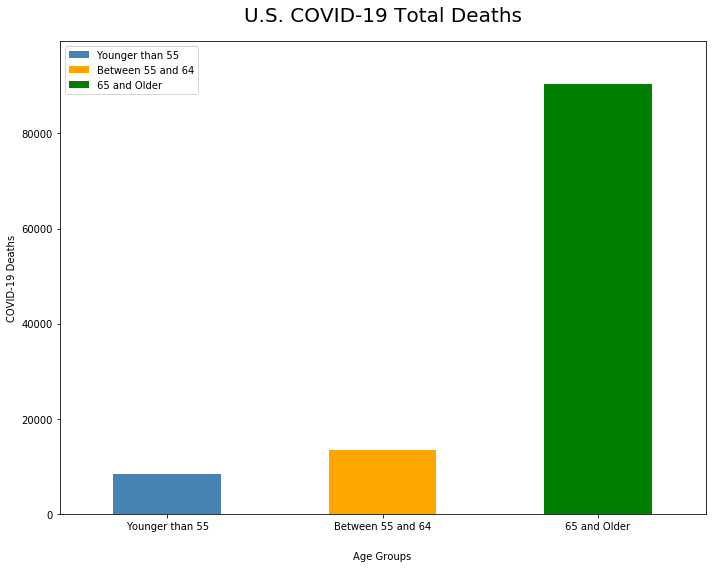

In [22]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"])+9000)

plt.title("U.S. COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [23]:
raw_total_overall_report.columns

Index(['California COVID-19 Total Deaths', 'Connecticut COVID-19 Total Deaths',
       'Virginia COVID-19 Total Deaths', 'Florida COVID-19 Total Deaths',
       'Georgia COVID-19 Total Deaths', 'Overall U.S. COVID-19 Total Deaths'],
      dtype='object')

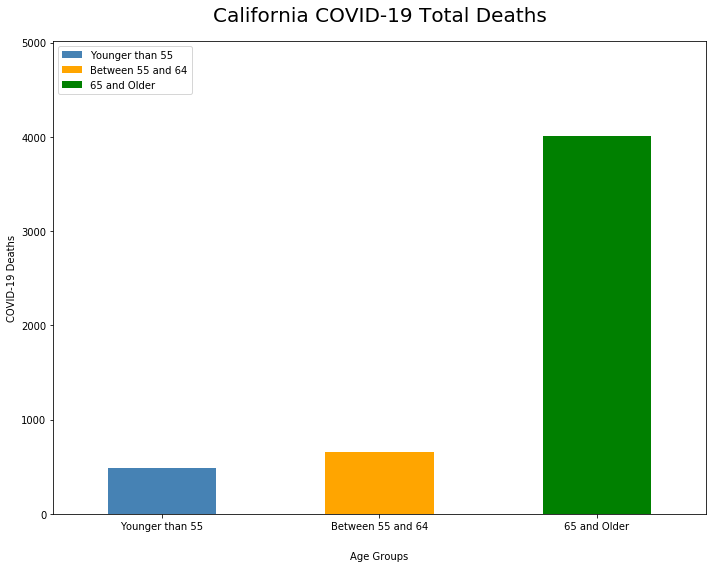

In [24]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["California COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["California COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["California COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["California COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["California COVID-19 Total Deaths"])+1000)

plt.title("California COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [25]:
 raw_total_overall_report

,California COVID-19 Total Deaths,Connecticut COVID-19 Total Deaths,Virginia COVID-19 Total Deaths,Florida COVID-19 Total Deaths,Georgia COVID-19 Total Deaths,Overall U.S. COVID-19 Total Deaths
Younger than 55,489.0,90.0,87.0,180.0,168.0,8401.0
Between 55 and 64,657.0,276.0,183.0,277.0,271.0,13465.0
65 and Older,4013.0,3085.0,1450.0,2502.0,1604.0,90357.0


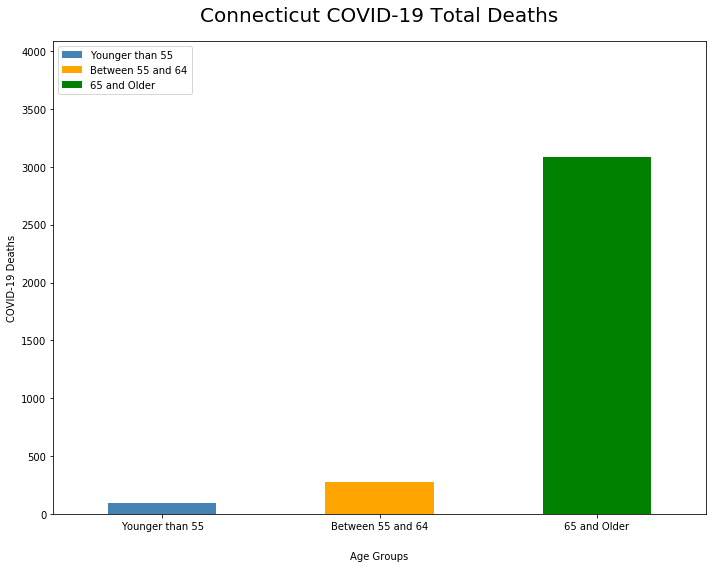

In [26]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["Connecticut COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["Connecticut COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["Connecticut COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["Connecticut COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["Connecticut COVID-19 Total Deaths"])+1000)

plt.title("Connecticut COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

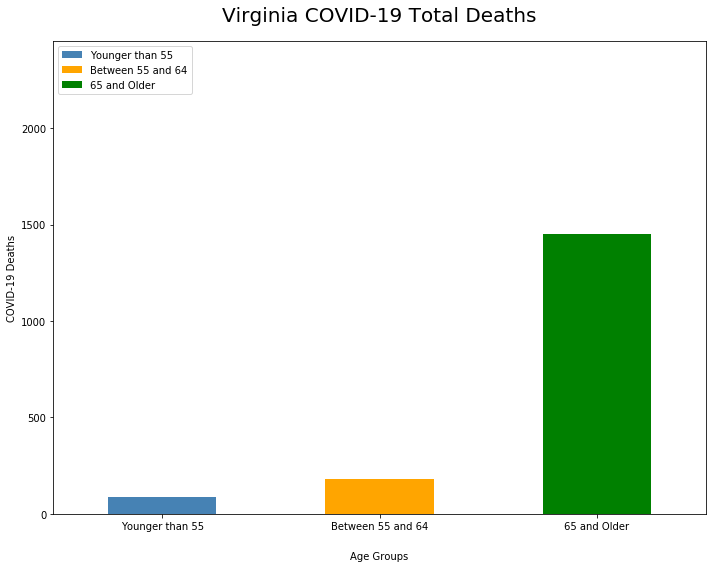

In [27]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["Virginia COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["Virginia COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["Virginia COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["Virginia COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["Virginia COVID-19 Total Deaths"])+1000)

plt.title("Virginia COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

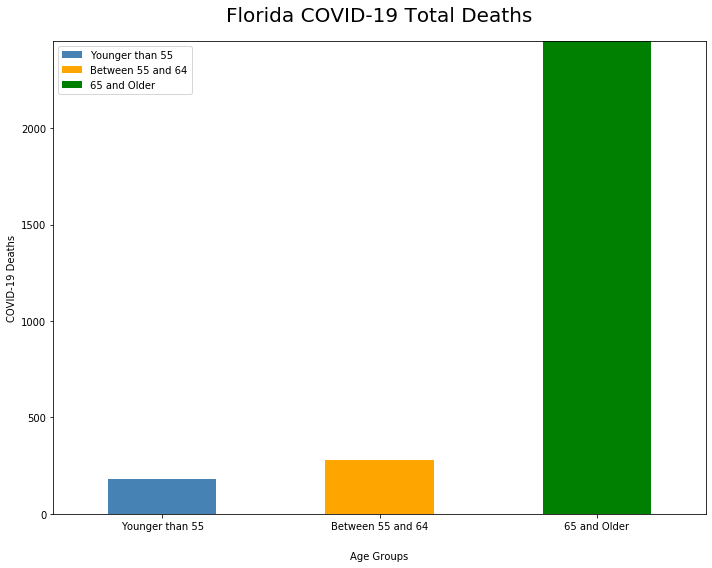

In [28]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["Florida COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["Florida COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["Florida COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["Florida COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["Virginia COVID-19 Total Deaths"])+1000)

plt.title("Florida COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [29]:
raw_total_overall_report

,California COVID-19 Total Deaths,Connecticut COVID-19 Total Deaths,Virginia COVID-19 Total Deaths,Florida COVID-19 Total Deaths,Georgia COVID-19 Total Deaths,Overall U.S. COVID-19 Total Deaths
Younger than 55,489.0,90.0,87.0,180.0,168.0,8401.0
Between 55 and 64,657.0,276.0,183.0,277.0,271.0,13465.0
65 and Older,4013.0,3085.0,1450.0,2502.0,1604.0,90357.0


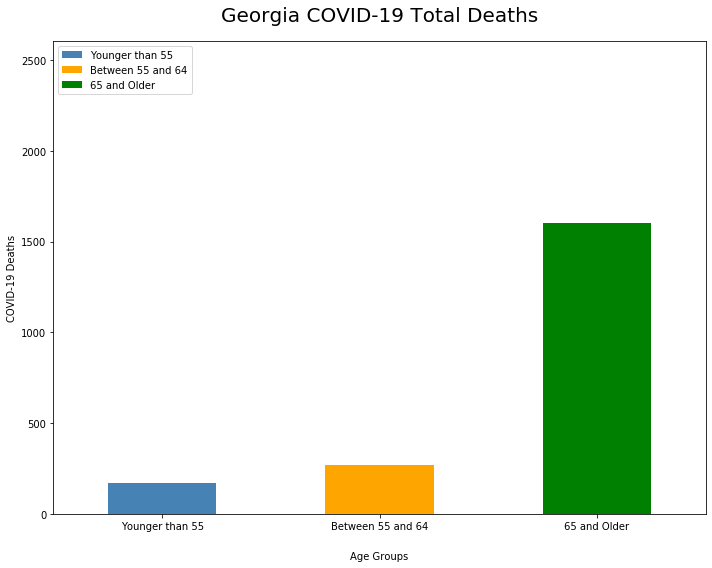

In [30]:
tick_locations = ["Younger than 55", "Between 55 and 64", "65 and Older"]

plt.figure(figsize=(10,8))
plt.bar(tick_locations, raw_total_overall_report["Georgia COVID-19 Total Deaths"], align="center", color="steelblue", width=0.5, label=tick_locations[0])
plt.bar(tick_locations, raw_total_overall_report["Georgia COVID-19 Total Deaths"], align="center", color="orange", width=0.5, label=tick_locations[1])
plt.bar(tick_locations, raw_total_overall_report["Georgia COVID-19 Total Deaths"], align="center", color="green", width=0.5, label=tick_locations[2])
plt.bar(tick_locations, raw_total_overall_report["Georgia COVID-19 Total Deaths"], align="center", color=["steelblue", "orange", "green"], width=0.5)
plt.xticks(tick_locations, rotation="horizontal")

plt.xlim(-0.5, len(tick_locations)-0.5)
plt.ylim(0, max(raw_total_overall_report["Georgia COVID-19 Total Deaths"])+1000)

plt.title("Georgia COVID-19 Total Deaths", fontsize=20, pad=20)
plt.xlabel("Age Groups", labelpad=20)
plt.ylabel("COVID-19 Deaths")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [31]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
california_covid_deaths = list(raw_total_overall_report["California COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

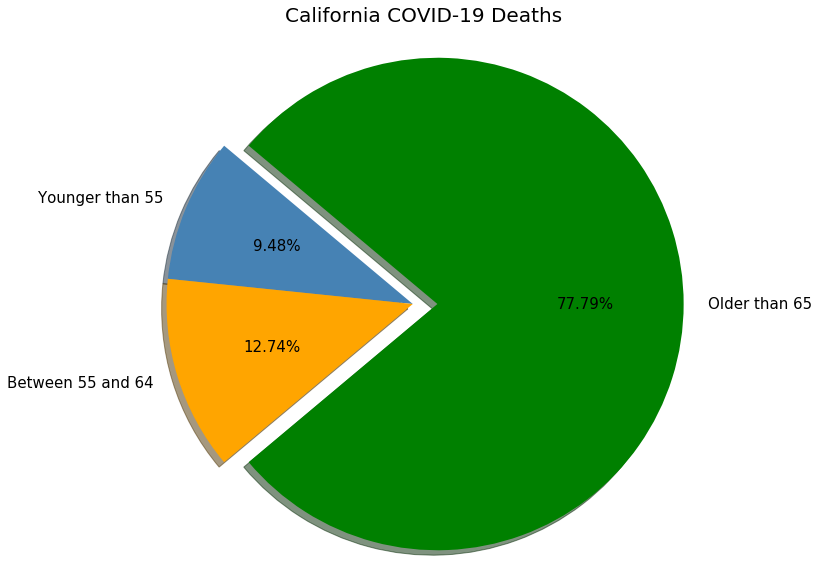

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(california_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("California COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()
plt.savefig("California.png")

In [33]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
california_covid_deaths = list(raw_total_overall_report["Connecticut COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

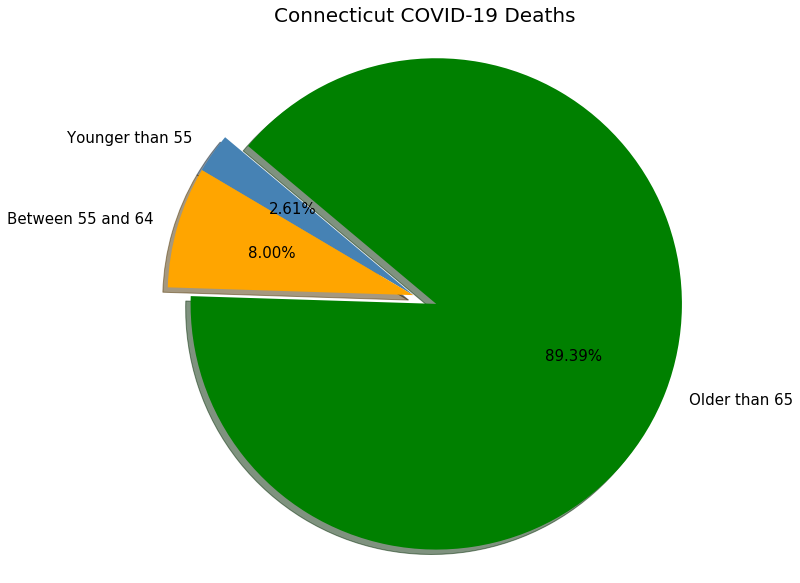

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(california_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("Connecticut COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()
plt.savefig("Connecticut.png")

In [35]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
Virginia_covid_deaths = list(raw_total_overall_report["Virginia COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

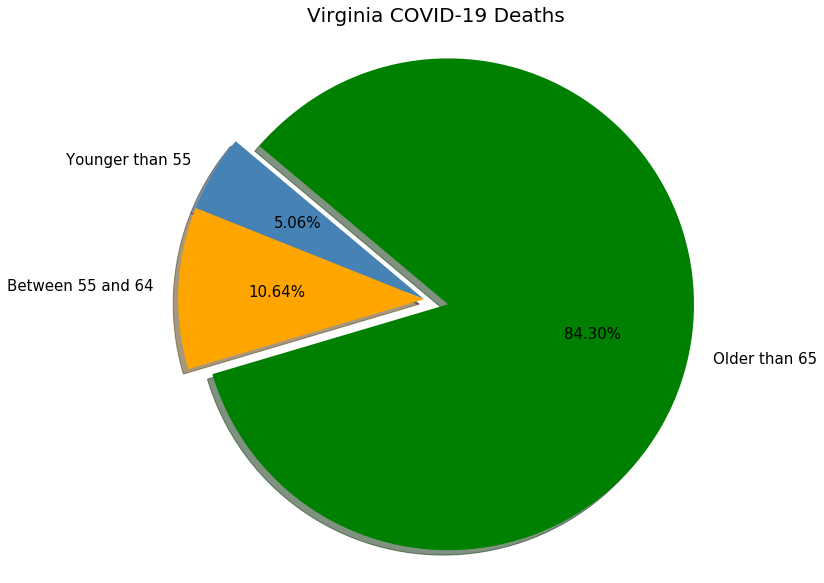

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(Virginia_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("Virginia COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()


In [37]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
Florida_covid_deaths = list(raw_total_overall_report["Florida COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

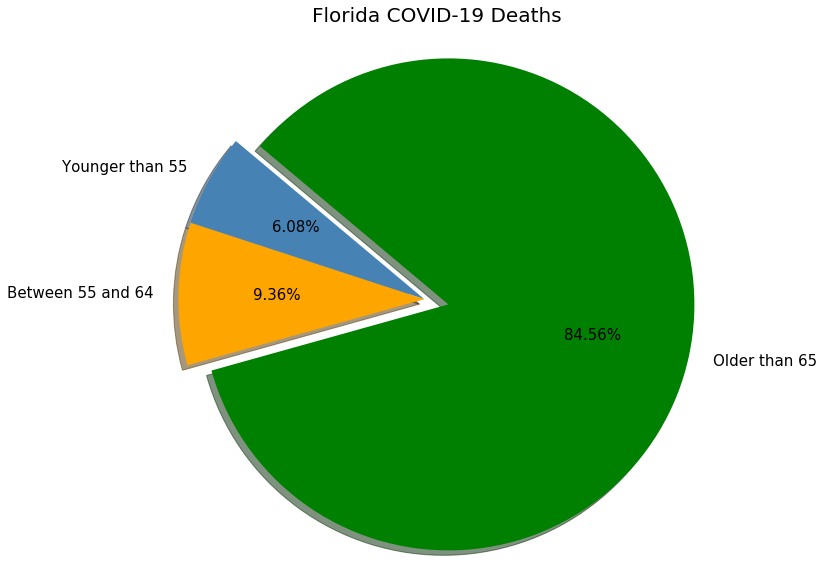

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(Florida_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("Florida COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()
plt.savefig("Florida.png")

In [39]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
Georgia_covid_deaths = list(raw_total_overall_report["Georgia COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

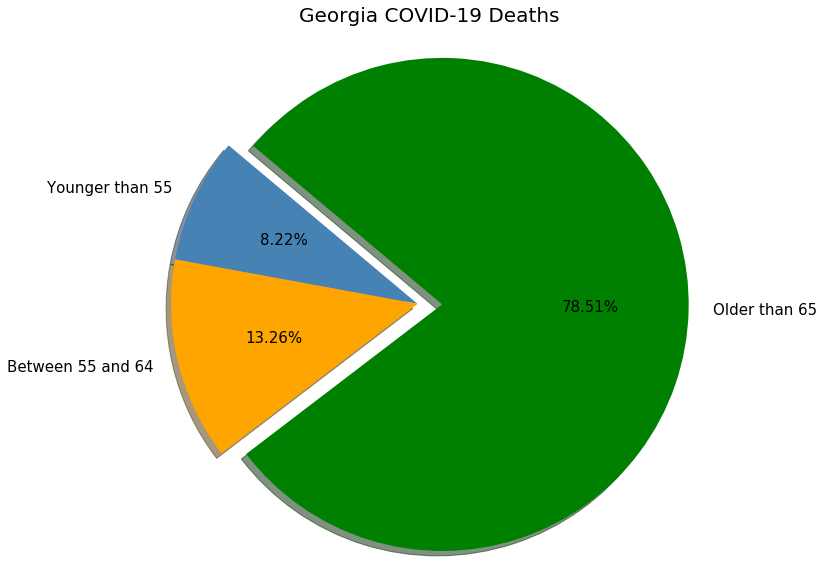

<Figure size 432x288 with 0 Axes>

In [40]:

plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(Georgia_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("Georgia COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()
plt.savefig("Georgia.png")


In [41]:
# Labels for the sections of our pie chart
labels = ["Younger than 55", "Between 55 and 64", "Older than 65"]

# The values of each section of the pie chart
US_covid_deaths = list(raw_total_overall_report["Overall U.S. COVID-19 Total Deaths"])

# The colors of each section of the pie chart
colors = ["steelblue", "orange", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1)

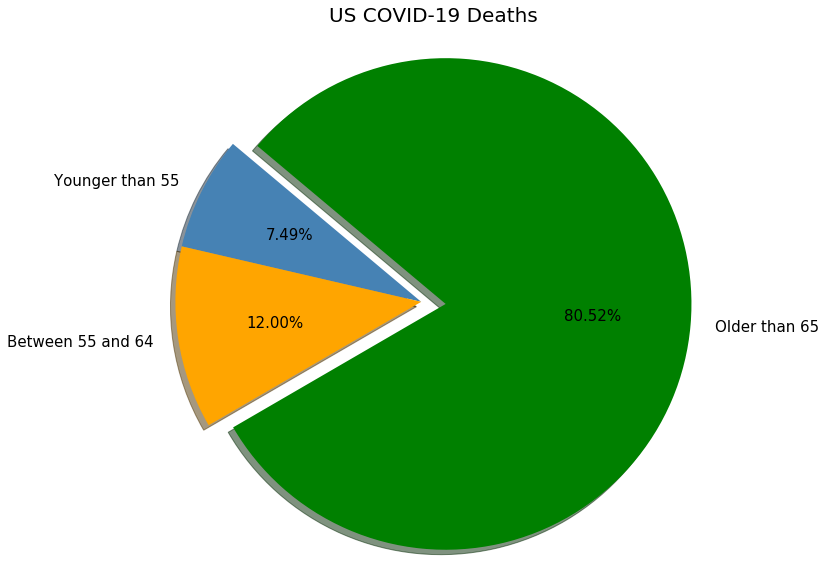

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = 15
plt.pie(US_covid_deaths, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)

plt.title("US COVID-19 Deaths", pad=10, fontsize=20)
plt.axis("equal")
plt.show()
plt.savefig("US.png")